#### STATISTICS FOR DATA ANALYSIS
# <a href="https://www.codecademy.com/paths/analyze-data-with-python/tracks/ida-6-statistics-for-data-analysis/modules/ida-6-2-quartiles-quantiles/projects/life-expectancy-by-country" target="_blank">Life Expectancy By Country</a>
Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.
<hr />
1. <p>We’ve imported a dataset containing the life expectancy in different countries. The data can be found in the variable named <code>data</code>.</p><p>To begin, let’s get a sense of what this data looks like. Print <code>data.head()</code> to see the first 5 rows of the dataset.</p><p>Look at the names of the columns. What other pieces of information does this dataset contain?</p><p>You may want to comment out this print statement after looking at the data.</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("country_data.csv")
print(data.head())
print(data.tail())

               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728
        Country  Life Expectancy          GDP
153     Uruguay         76.07500  7192.584875
154  Uzbekistan         68.03125   651.092359
155     Vanuatu         71.38750  2000.245518
156      Zambia         53.90625   811.811841
157    Zimbabwe         50.48750   410.980194


2. <p>Let’s isolate the column that contains the life expectancy and store it in a variable named <code>life_expectancy</code>. To get a single column from a Panda DataFrame, use this syntax:<br /><code>single_column = dataFrameName["columnName"]</code></p><p>Make sure to pay attention to capitalization and spaces when using the column name!</p>

In [4]:
life_expectancy = data["Life Expectancy"]
print(life_expectancy)

0      58.19375
1      75.15625
2      73.61875
3      49.01875
4      75.05625
         ...   
153    76.07500
154    68.03125
155    71.38750
156    53.90625
157    50.48750
Name: Life Expectancy, Length: 158, dtype: float64


3. <p>We can now use NumPy functions on that column! Let’s use the <code>np.quantile()</code> function to find the quartiles of <code>life_expectancy</code>. Store the result in a variable named <code>life_expectancy_quartiles</code> and print the results.</p>

In [6]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


4. <p>Nice work! By looking at those three values you can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between <code>72.5</code> years and <code>75.4</code> years.</p><p>Could you predict what the histogram might look like from those three number? Plot the histogram by using the following two lines of code:<br /><code>plt.hist(life_expectancy)</code><br /><code>plt.show()</code></p>Does it look how you expected?

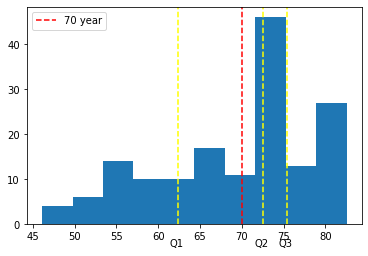

In [7]:
# plot the histogram here:
plt.hist(life_expectancy)
plt.axvline(70, color = "red", linestyle = "--", label = "70 year")
q = 0
for line in life_expectancy_quartiles:
  q += 1
  plt.axvline(line, linestyle = "--", color = "yellow")
  plt.text(line - 1, -5, 'Q{}'.format(q))
plt.legend()
plt.show()

5. <p>Let’s take a moment to think about the meaning of these quartiles. If your country has a life expectancy of <code>70</code> years, does that fall in the first, second, third, or final quarter of the data?</p>

6. <p>GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.</p><p>Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.</p><p>To start, let’s isolate the GDP column and store it in a variable named <code>gdp</code>. This should be similar to how you isolated the life expectancy column.</p>

In [8]:
gdp = data["GDP"]
print(gdp)

0       340.015425
1      2119.726679
2      2847.853392
3      1975.143045
4      9759.305728
          ...     
153    7192.584875
154     651.092359
155    2000.245518
156     811.811841
157     410.980194
Name: GDP, Length: 158, dtype: float64


7. <p>We now want to find the median GDP. You can use NumPy’s <code>np.median()</code> function, but since the median is also a quantile, we can call <code>np.quanitle()</code> using <code>0.5</code> as the second parameter.</p><p>Store the median in a variable named <code>median_gdp</code>. Print that variable to see the median.</p>

In [9]:
median_gdp = np.median(gdp)
print(median_gdp)
print(np.quantile(gdp, 0.5))

2938.0781152500003
2938.0781152500003


8. <p>Let’s now grab all of the rows from our original dataset that have a GDP less than or equal to the median. The following code will do that for you<br /><code>low_gdp = data[data['GDP'] <= median_gdp]</code></p><p>Do the same for all of the rows that have a GDP higher than the median. Store those rows in a variable named <code>high_gdp</code>.</p><p>The line of code should look almost identical to the one above, but you should change the <code><=</code> to <code>></code>.</p>

In [10]:
low_gdp = data[data["GDP"] <= median_gdp]
print(low_gdp)
high_gdp = data[data["GDP"] > median_gdp]
print(high_gdp)

         Country  Life Expectancy          GDP
0    Afghanistan         58.19375   340.015425
1        Albania         75.15625  2119.726679
2        Algeria         73.61875  2847.853392
3         Angola         49.01875  1975.143045
6        Armenia         73.40000  1999.986318
..           ...              ...          ...
151      Ukraine         69.93750  1577.293329
154   Uzbekistan         68.03125   651.092359
155      Vanuatu         71.38750  2000.245518
156       Zambia         53.90625   811.811841
157     Zimbabwe         50.48750   410.980194

[79 rows x 3 columns]
                  Country  Life Expectancy           GDP
4     Antigua and Barbuda         75.05625   9759.305728
5               Argentina         75.15625   6998.575103
7               Australia         81.81250  34637.565047
8                 Austria         81.48125  33827.476309
9              Azerbaijan         70.73125   3302.947807
..                    ...              ...           ...
146   Trinidad

9. <p>Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other.</p><p>Find the quartiles of the <code>"Life Expectancy"</code> column of low_gdp. Store the quartiles in a variable named <code>low_gdp_quartiles</code>. Print the results.</p>

In [11]:
def get_quartiles(df):
  return np.quantile(df, [0.25, 0.5, 0.75])

low_gdp_quartiles = get_quartiles(low_gdp["Life Expectancy"])
print(low_gdp_quartiles)

[56.3375  64.34375 71.7375 ]


10. <p>Find the quartiles of the high GDP countries and store them in a variable named <code>high_gdp_quartiles</code>. This should look very similar to the last line of code you wrote. Print the results.</p>

In [12]:
high_gdp_quartiles = get_quartiles(high_gdp["Life Expectancy"])
print(high_gdp_quartiles)

[72.965625 75.15625  80.521875]


11. <p>By looking at the quantiles, you should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.</p><p>Remove the two lines of code that are currently plotting the histogram of the original dataset. At the bottom of your code, add these four lines:<br /><code>plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")</code><br /><code>plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")</code><br /><code>plt.legend()</code><br /><code>plt.show()</code></p>

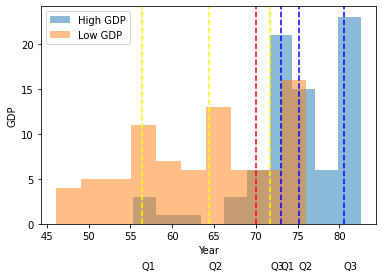

In [13]:
# add your code here:
def add_quartiles(df, color = "yellow"):
  quartiles = get_quartiles(df)
  q = 0
  for line in quartiles:
    q += 1
    plt.axvline(line, linestyle = "--", color = color)
    plt.text(line, -5, 'Q{}'.format(q))

plt.close("all")
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP")
plt.axvline(70, color = "red", linestyle = "--", label = "70 year")
add_quartiles(low_gdp["Life Expectancy"])
add_quartiles(high_gdp["Life Expectancy"], "blue")
plt.show()

12. <p>We can now truly see the impact GDP has on life expectancy.</p><p>Once again, consider a country that has a life expectancy of <code>70</code> years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy? What if the country is in the bottom half of GDP countries? Check the hint to see our thoughts.</p>